<h1 align='center'>  CAR PRICE PREDICTION </h1>

### **OVERVIEW**

TheMathCompany is a modern, hybrid consulting firm that builds Custom AI Applications for Fortune 500 & equivalent companies. Our well-rounded consulting model addresses pressing gaps that exist in conventional analytics service provider models and off-the-shelf products. We offer the collective advantages of customization, diverse problem-solving capabilities, speed of delivery, reusability and scalability – all powered by our proprietary AI master engine, Co.dx.

TheMathCompany, enable data analytics transformations for Fortune 500 organizations across the world. They enable clients to build core capabilities that set them on a path to achieve analytics self-sufficiency. Over the last four years, they have been consistently doubling in size year-on-year with 600+(and counting...) Data Scientists & Engineers, Consultants and Visualization experts. An exciting opportunity to be a part of the growth journey of one of the fastest growing AI & ML firms – scope for experimentation, the big & small victories, the learning and everything in between.
<br></br>
#### **The Challenge**

With the rise in the variety of cars with differentiated capabilities and features such as model, production year, category, brand, fuel type, engine volume, mileage, cylinders, colour, airbags and many more, we are bringing a car price prediction challenge for all. We all aspire to own a car within budget with the best features available. 

- To solve the price problem we have created a dataset of 19237 for the training dataset and 8245 for the test dataset.


## 0. Goal

In this Jupyter Notepad, we will be aiming at predicting the car price based on various features.

### All the Lifrcycle in A Data Science Project

1. **Data Analysis / Data Preprocessing**
2. **Feature Engineering**
3. **Feature Selection**
4. **Model Building**
5. **Model Deployment**

## 1. Import relevant Dependencies

Incase you are getting any error saying the package is not installed while running the below cell, then you can use two methods:
- pip install ________.
- google 'How to install ________'.

In [1]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline   

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('fivethirtyeight')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine Learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.ensemble import RandomForestRegressor

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Display all the columns/rows of the DataFrame.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 2. Loading the required Data

In [2]:
# Import the train and test data.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Viewing the train dataset
train.head() # --> First 5 Rows.

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4


In [4]:
print("Length of the train dataset: ", len(train))
print("Dimensionality of the test dataset: ", test.shape)

Length of the train dataset:  19237
Dimensionality of the test dataset:  (8245, 18)


# Training Dataset 

## 3. Exploratory Data Analysis & Feature Engineering
**PROBLEM:** To Predict the Price of a Car based on the information provided in the Test dataset.

### Data Dictionary

- **ID** 

- **Price:** Price of the Car (Target Variable)

- **Levy:** A form of Tax

- **Manufacturer:** Company of the Car (eg:- Toyota, Tesla, etc..)

- **Model** 

- **Prod. year:** Year of Manufacturing

- **Category**

- **Leather interior:** Yes, No	

- **Fuel type**

- **Engine volume:** Engine Capacity

- **Mileage** 

- **Cylinders:** 1 (Minimum); 16 (Maximum)

- **Gear box type:** Automatic; Manual; Tiptronic; Variator

- **Drive wheels:** 4x4; Front; Rear

- **Doors:** 2; 4; More than 5 

- **Wheel:** Left-wheel; Right-hand drive

- **Color** 

- **Airbags:** 0 (Minimum); 16 (Maximum)



- ### ***From our initial Data Analysis using Excel we had found that:-***
    - ### Price Column has some confusing values (eg: 1,3,6,9.....).
    - ### Levy Column has '-' values which need to be dealt with as Missing Values.
    - ### Mileage had 0 km (This is a nonesense statement).
    - ### Doors Column is having months attached.



### Dealing with Special values 

- Replacing '-' with NaN Values in the Levy Column.

In [5]:
train['Levy'].replace('-',np.nan, inplace= True)
train.fillna(0, inplace= True)
train.drop(columns= ['ID', 'Manufacturer', 'Model', 'Color'], inplace= True)
train.head()

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
0,13328,1399,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,12
1,16621,1018,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,8
2,8467,0,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,2
3,3607,862,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,0
4,11726,446,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,4


#### In Data Analysis we will analyse to find out the below stuff

1. **Missing Values**
2. **All the Numerical Variables**
3. **Distribution of the Numerical Variables**
4. **Categorical Variables**
5. **Cardinality of Categorical Variables**
6. **Outliers**
7. **Relationship between Independent and Dependent feature (Price)**

### Missing Values

- In any dataset we will initially try to find out where the missing data are, because then we will know what are the major NaN values in our dataset. 

<AxesSubplot:>

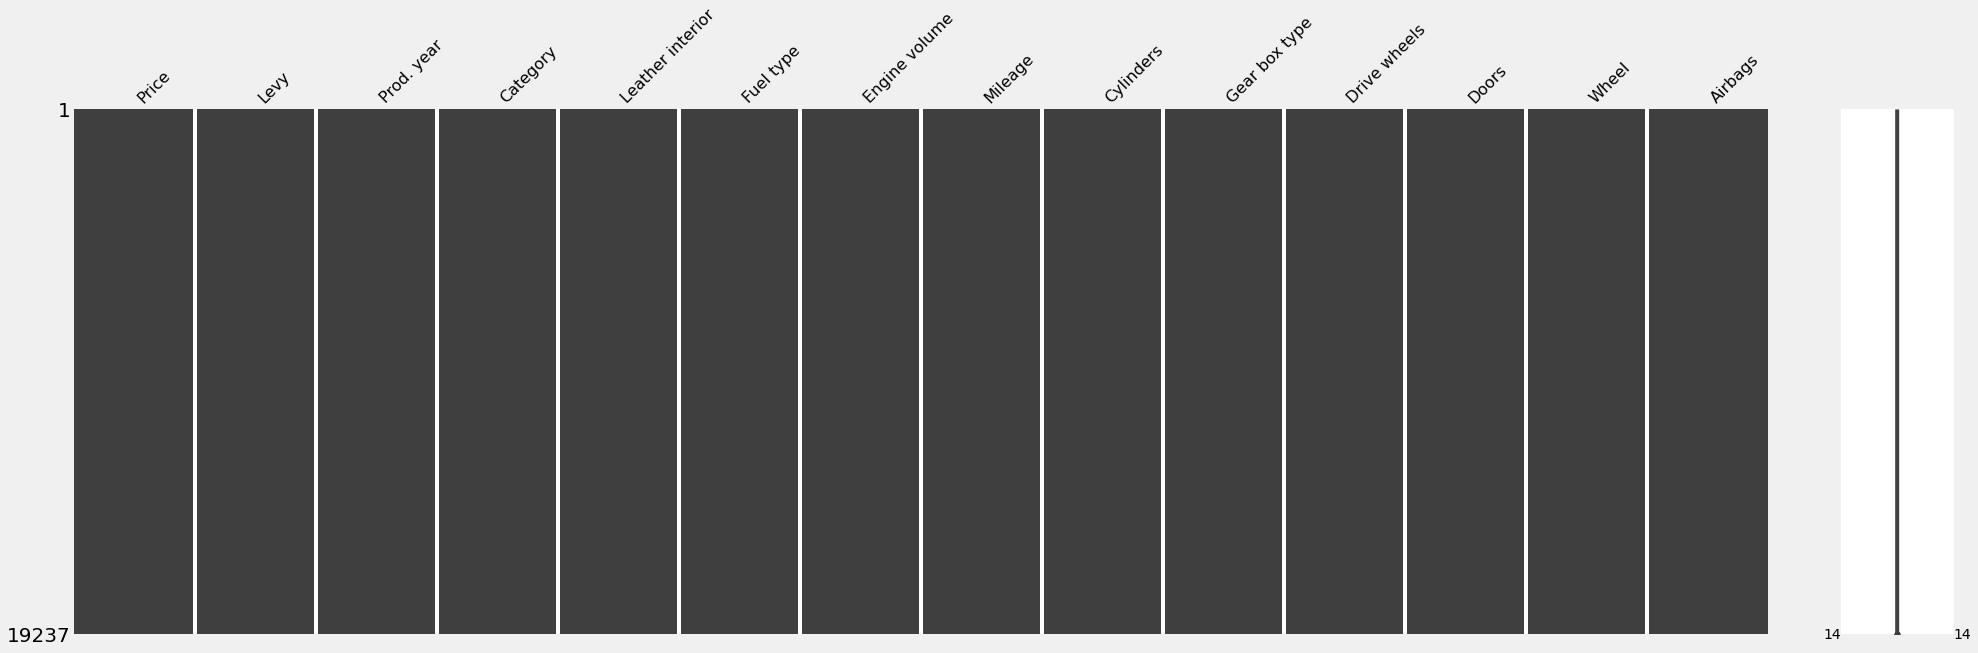

In [6]:
# To plot a graphic of missing values
missingno.matrix(train,figsize=(30,9))

> ## Let's understand it a bit more with a different technique. 

In [7]:
# Understanding more about the missing value column

def missing_values_table(df):
    # number of missing values
    mis_val = df.isnull().sum()

    # % of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # make table # axis '0' concat along index, '1' column
    mis_val_table = pd.concat([mis_val,mis_val_percent], axis= 1) 

    # rename columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})

    # sort by column
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!= 0].sort_values(
        '% of Total Values', ascending= False).round(1) #Review
    print("Your selected dataset has " + str(df.shape[1]) + " columns and " + str(len(df)) + " observations.\n"
         "\n There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    
    # return the dataframe with missing info
    return mis_val_table_ren_columns

missing_values_table(train)

Your selected dataset has 14 columns and 19237 observations.

 There are 0 columns that have missing values.


,Missing Values,% of Total Values


### What Datatypes are there in the dataframe?

We usually consider features with a datatype of object as categorical features. And those with float or int could be numerical features.

However, sometimes the features that we consider as numerical might actually turn out to be categorical.

The next few steps will help us figure out how to process our data so our machine learning model can learn from it.
Ideally all the features will be encoded into a numerical value of some kind (maybe 0 or 1 / something else).

In [8]:
# Datatypes in the dataset
train.dtypes

Price                int64
Levy                object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage             object
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Wheel               object
Airbags              int64
dtype: object

- ### *We can see that most of the Columns are either of 'int' Data Type or of 'str' Data Type.*

### 3.1 **Exploring each of these features**
We will go through each of the columns and see which all we can use in our first models. Some of them needs more preprocessing than the others to get ready.

In [9]:
train.head()

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
0,13328,1399,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,12
1,16621,1018,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,8
2,8467,0,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,2
3,3607,862,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,0
4,11726,446,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,4


#### FEATURE 1: Price
Description: Cost of the cars.

***This is the variable we want our ML model to predict based off the others.***

In [10]:
## Number of Unique prices alloted to us.
train['Price'].nunique()

2315

- Here we can see that there is a total of 2315 unique Price values.

In [11]:
## To check if there are any missing values.
train['Price'].isnull().any()

False

> ### We had observed that the Price Column has some Confusing values. We could see Cars with a Price of 1,3,6,.... all the way up to 26307500. Now this can be a bit confusing as the Price is a single digit.

### *What we can do here is consider these values as Outliers and then try capping them.*

In [12]:
# Re-Indexing the Train Dataset.
train.insert(0, '', range(0, 0 + len(train)))
train.set_index('', inplace= True)
train.head()

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
,,,,,,,,,,,,,,
0,13328,1399,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,12
1,16621,1018,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,8
2,8467,0,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,2
3,3607,862,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,0
4,11726,446,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,4


### Outliers Analysis

<AxesSubplot:ylabel='Density'>

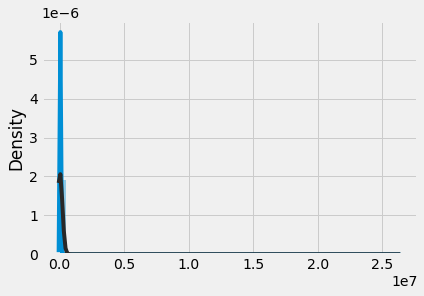

In [13]:
# Normality Check
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(x= train['Price'], fit= norm)

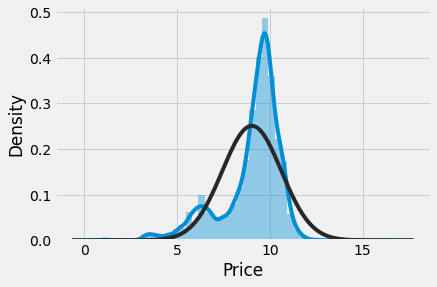

<Figure size 432x288 with 0 Axes>

In [14]:
train['Price'] = np.log(train['Price'])
sns.distplot(train['Price'], fit=norm)
fig = plt.figure()

<AxesSubplot:xlabel='Price'>

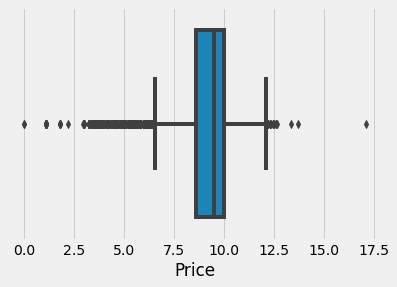

In [15]:
sns.boxplot(x= train['Price'])

In [16]:
## Z-Score --> When Feature followa Normal Distibution.

mean = train['Price'].mean()
std = train['Price'].std()

Upper_Bound = mean + (3*std)
Lower_Bound = mean - (3*std)

train['Price'][train['Price'] < Lower_Bound] = Lower_Bound
train['Price'][train['Price'] > Upper_Bound] = Upper_Bound

<AxesSubplot:xlabel='Price'>

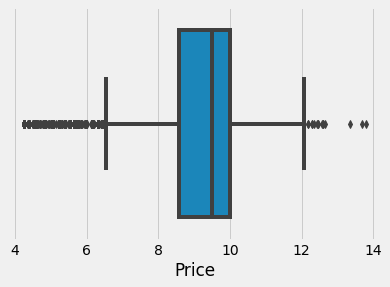

In [17]:
sns.boxplot(x= train['Price'])

#### FEATURE 2: Levy

In [18]:
train['Levy'] = train['Levy'].astype(float)

## Observing the unique values.
train.Levy.unique()

array([ 1399.,  1018.,     0.,   862.,   446.,   891.,   761.,   751.,
         394.,  1053.,  1055.,  1079.,   810.,  2386.,  1850.,   531.,
         586.,  1249.,  2455.,   583.,  1537.,  1288.,   915.,  1750.,
         707.,  1077.,  1486.,  1091.,   650.,   382.,  1436.,  1194.,
         503.,  1017.,  1104.,   639.,   629.,   919.,   781.,   530.,
         640.,   765.,   777.,   779.,   934.,   769.,   645.,  1185.,
        1324.,   830.,  1187.,  1111.,   760.,   642.,  1604.,  1095.,
         966.,   473.,  1138.,  1811.,   988.,   917.,  1156.,   687.,
       11714.,   836.,  1347.,  2866.,  1646.,   259.,   609.,   697.,
         585.,   475.,   690.,   308.,  1823.,  1361.,  1273.,   924.,
         584.,  2078.,   831.,  1172.,   893.,  1872.,  1885.,  1266.,
         447.,  2148.,  1730.,   730.,   289.,   502.,   333.,  1325.,
         247.,   879.,  1342.,  1327.,  1598.,  1514.,  1058.,   738.,
        1935.,   481.,  1522.,  1282.,   456.,   880.,   900.,   798.,
      

<AxesSubplot:ylabel='Density'>

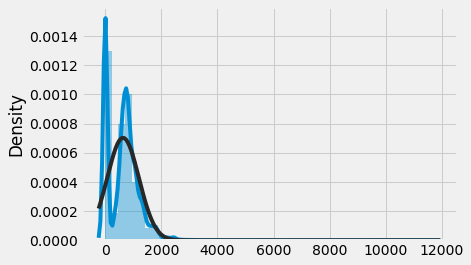

In [19]:
# Normality Check
sns.distplot(x= train['Levy'], fit= norm)

In [20]:
## Z-Score --> When Feature followa Normal Distibution.

mean = train['Levy'].mean()
std = train['Levy'].std()

Upper_Bound = mean + (3*std)
Lower_Bound = mean - (3*std)

train['Levy'][train['Levy'] < Lower_Bound] = Lower_Bound
train['Levy'][train['Levy'] > Upper_Bound] = Upper_Bound

<AxesSubplot:xlabel='Levy'>

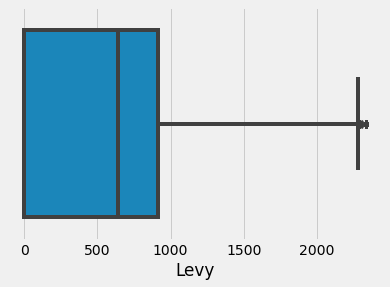

In [21]:
sns.boxplot(x= train['Levy'])

- ### Here we can see that Levy Column do follow Normal Distribution. Now let's check for any Outliers.

#### FEATURE 5: Production Year

In [22]:
train['Prod. year'].unique()

array([2010, 2011, 2006, 2014, 2016, 2013, 2007, 1999, 1997, 2018, 2008,
       2012, 2017, 2001, 1995, 2009, 2000, 2019, 2015, 2004, 1998, 1990,
       2005, 2003, 1985, 1996, 2002, 1993, 1992, 1988, 1977, 1989, 1994,
       2020, 1984, 1986, 1991, 1983, 1953, 1964, 1974, 1987, 1943, 1978,
       1965, 1976, 1957, 1980, 1939, 1968, 1947, 1982, 1981, 1973],
      dtype=int64)

In [23]:
train.head()

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
,,,,,,,,,,,,,,
0,9.497622,1399.0,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,12
1,9.718422,1018.0,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,8
2,9.043932,0.0,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,2
3,8.190632,862.0,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,0
4,9.369564,446.0,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,4


#### FEATURE 7: Leather Interior

<AxesSubplot:xlabel='count', ylabel='Leather interior'>

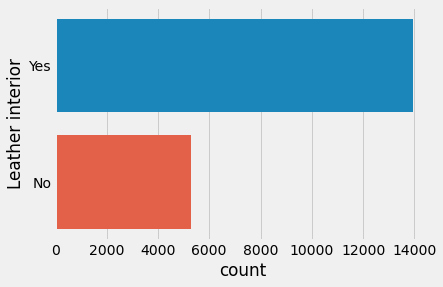

In [24]:
sns.countplot(y= train['Leather interior'])

#### FEATURE 8: Fuel Type

<AxesSubplot:xlabel='count', ylabel='Fuel type'>

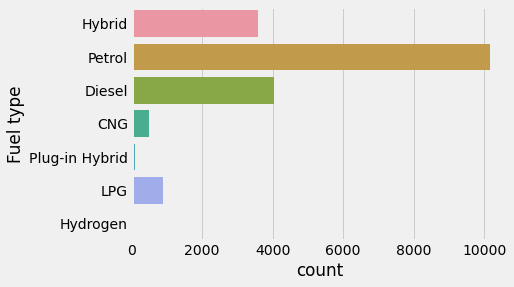

In [25]:
sns.countplot(y= train['Fuel type'])

#### FEATURE 9: Engine Volume

In [26]:
train['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [27]:
train['Engine volume'] = train['Engine volume'].apply(lambda x: x.split(' ')[1] if ' ' in x else 'Not Turbo')

In [28]:
train['Engine volume'].unique()

array(['Not Turbo', 'Turbo'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Engine volume'>

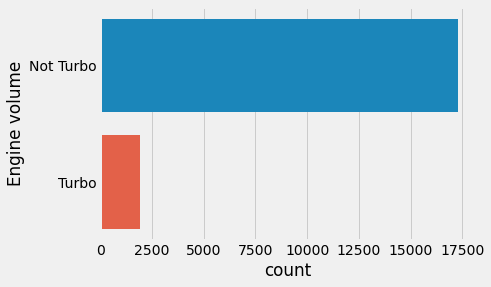

In [29]:
sns.countplot(y= train['Engine volume'])

#### FEATURE 10: Mileage

In [30]:
train['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [31]:
train['Mileage'] = train['Mileage'].apply(lambda x: x.split('km')[0] if 'km' in x else x).astype(int)

#### FEATURE 11: Cylinders

<AxesSubplot:xlabel='Cylinders', ylabel='Density'>

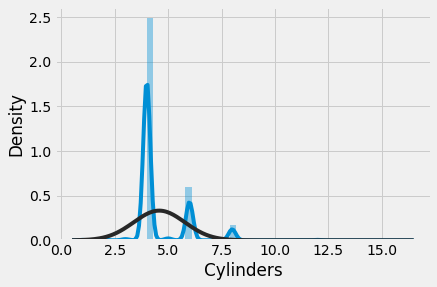

In [32]:
sns.distplot(train['Cylinders'], fit= norm)

#### FEATURE 12: Gear Box Type

<AxesSubplot:xlabel='count', ylabel='Gear box type'>

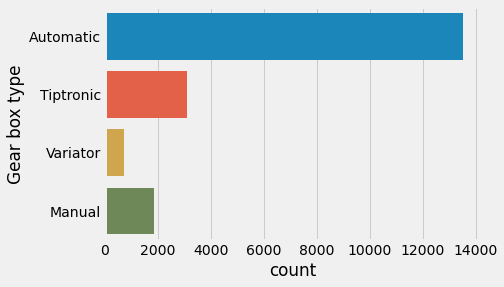

In [33]:
sns.countplot(y= train['Gear box type'])

#### FEATURE 13: Drive Wheels

<AxesSubplot:xlabel='count', ylabel='Drive wheels'>

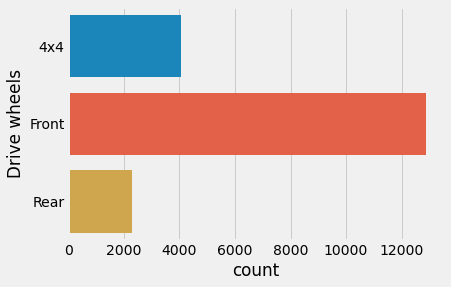

In [34]:
sns.countplot(y= train['Drive wheels'])

#### FEATURE 14: Doors

In [35]:
train['Doors'] = train['Doors'].apply(lambda x: x.split('-')[0] if '-' in x else x)

<AxesSubplot:xlabel='count', ylabel='Doors'>

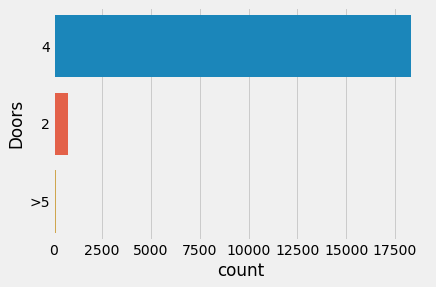

In [36]:
sns.countplot(y= train['Doors'])

#### FEATURE 15: Wheel

<AxesSubplot:xlabel='count', ylabel='Wheel'>

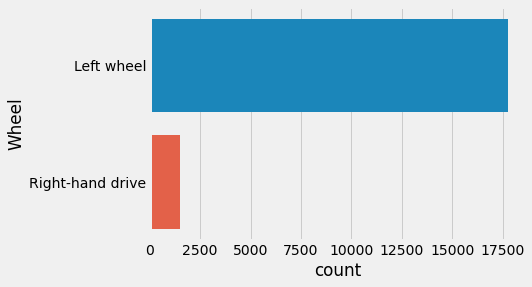

In [37]:
sns.countplot(y= train['Wheel'])

#### FEATURE 17: Airbags

<AxesSubplot:xlabel='Airbags', ylabel='Density'>

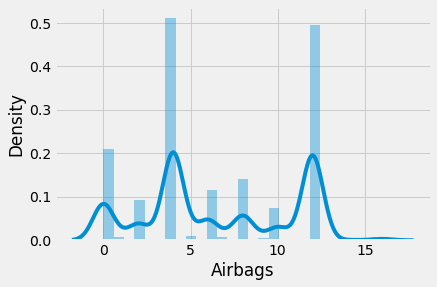

In [38]:
sns.distplot(train['Airbags'])

In [39]:
train.head()

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
,,,,,,,,,,,,,,
0,9.497622,1399.0,2010,Jeep,Yes,Hybrid,Not Turbo,186005,6,Automatic,4x4,4,Left wheel,12
1,9.718422,1018.0,2011,Jeep,No,Petrol,Not Turbo,192000,6,Tiptronic,4x4,4,Left wheel,8
2,9.043932,0.0,2006,Hatchback,No,Petrol,Not Turbo,200000,4,Variator,Front,4,Right-hand drive,2
3,8.190632,862.0,2011,Jeep,Yes,Hybrid,Not Turbo,168966,4,Automatic,4x4,4,Left wheel,0
4,9.369564,446.0,2014,Hatchback,Yes,Petrol,Not Turbo,91901,4,Automatic,Front,4,Left wheel,4


## 4. Feature Encoding & Feature Scaling

In [40]:
train.head()

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
,,,,,,,,,,,,,,
0,9.497622,1399.0,2010,Jeep,Yes,Hybrid,Not Turbo,186005,6,Automatic,4x4,4,Left wheel,12
1,9.718422,1018.0,2011,Jeep,No,Petrol,Not Turbo,192000,6,Tiptronic,4x4,4,Left wheel,8
2,9.043932,0.0,2006,Hatchback,No,Petrol,Not Turbo,200000,4,Variator,Front,4,Right-hand drive,2
3,8.190632,862.0,2011,Jeep,Yes,Hybrid,Not Turbo,168966,4,Automatic,4x4,4,Left wheel,0
4,9.369564,446.0,2014,Hatchback,Yes,Petrol,Not Turbo,91901,4,Automatic,Front,4,Left wheel,4


### 4.1 Dealing with Categorical Columns (Feature Encoding)

In [41]:
# Obtaining the Categorical Columns
categorical_features = [features for features in train.columns if train[features].dtypes == 'O'] 

In [42]:
categorical_features

['Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel']

In [43]:
# Let's See how many labels each feature has

for feature in categorical_features:
    print(feature,':',train[feature].nunique(),'labels')

Category : 11 labels
Leather interior : 2 labels
Fuel type : 7 labels
Engine volume : 2 labels
Gear box type : 4 labels
Drive wheels : 3 labels
Doors : 3 labels
Wheel : 2 labels


In [44]:
train = pd.get_dummies(train, drop_first=True)
train.shape

(19237, 32)

In [45]:
train.head()

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Leather interior_Yes,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Engine volume_Turbo,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Doors_4,Doors_>5,Wheel_Right-hand drive
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,9.497622,1399.0,2010,186005,6,12,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,9.718422,1018.0,2011,192000,6,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,9.043932,0.0,2006,200000,4,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1
3,8.190632,862.0,2011,168966,4,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,9.369564,446.0,2014,91901,4,4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


### 4.2 Dealing with Numerical Columns (Feature Scaling)

We are performing Feature Scaling because as we can see there are many Features that are measured to different units. With the help of Feature Scaling we can apply **Machine Learning Algorithms** in a better way.

In [46]:
# Obtaining Numerical Columns

numerical_features = [features for features in train.columns if train[features].dtypes != 'O'] 
numerical_features

['Price',
 'Levy',
 'Prod. year',
 'Mileage',
 'Cylinders',
 'Airbags',
 'Category_Coupe',
 'Category_Goods wagon',
 'Category_Hatchback',
 'Category_Jeep',
 'Category_Limousine',
 'Category_Microbus',
 'Category_Minivan',
 'Category_Pickup',
 'Category_Sedan',
 'Category_Universal',
 'Leather interior_Yes',
 'Fuel type_Diesel',
 'Fuel type_Hybrid',
 'Fuel type_Hydrogen',
 'Fuel type_LPG',
 'Fuel type_Petrol',
 'Fuel type_Plug-in Hybrid',
 'Engine volume_Turbo',
 'Gear box type_Manual',
 'Gear box type_Tiptronic',
 'Gear box type_Variator',
 'Drive wheels_Front',
 'Drive wheels_Rear',
 'Doors_4',
 'Doors_>5',
 'Wheel_Right-hand drive']

> - Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

> - Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

<h3>It is important to remember that we need not perform Feature Scaling on the 'Prod. Year' and 'Price' column as one the number and the other is our Dependent Variable.</h3>

In [47]:
# Selecting all Features that need to be Scaled except 'Prod. year' & 'Price'.
scale_feature = [features for features in numerical_features if features not in ['Price', 'Prod. year', 'Category_Coupe', 'Category_Goods wagon', 'Category_Hatchback', 'Category_Jeep', 'Category_Limousine', 
       'Category_Microbus', 'Category_Minivan', 'Category_Pickup', 'Category_Sedan', 'Category_Universal', 'Leather interior_Yes', 
       'Fuel type_Diesel', 'Fuel type_Hybrid', 'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid', 
       'Engine volume_Turbo', 'Gear box type_Manual', 'Gear box type_Tiptronic', 'Gear box type_Variator', 'Drive wheels_Front', 
       'Drive wheels_Rear','Doors_4', 'Doors_>5', 'Wheel_Right-hand drive']]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler = RobustScaler()

# Transform the train set and add the 'Prod. year' & 'Price' Columns.
train = pd.concat([train[['Price', 'Prod. year', 'Category_Coupe', 'Category_Goods wagon', 'Category_Hatchback', 'Category_Jeep', 'Category_Limousine', 
       'Category_Microbus', 'Category_Minivan', 'Category_Pickup', 'Category_Sedan', 'Category_Universal', 'Leather interior_Yes', 
       'Fuel type_Diesel', 'Fuel type_Hybrid', 'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid', 
       'Engine volume_Turbo', 'Gear box type_Manual', 'Gear box type_Tiptronic', 'Gear box type_Variator', 'Drive wheels_Front', 
       'Drive wheels_Rear','Doors_4', 'Doors_>5', 'Wheel_Right-hand drive']].reset_index(drop= True), 
       pd.DataFrame(scaler.fit_transform(train[scale_feature]), columns= scale_feature)], axis= 1) 
       ## Converting to Dataframe as after transform its an array.

train.head()

,Price,Prod. year,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Leather interior_Yes,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Engine volume_Turbo,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Doors_4,Doors_>5,Wheel_Right-hand drive,Levy,Mileage,Cylinders,Airbags
0,9.497622,2010,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.825518,0.505310,2.0,0.75
1,9.718422,2011,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0.410033,0.555794,2.0,0.25
2,9.043932,2006,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,-0.700109,0.623163,0.0,-0.50
3,8.190632,2011,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.239913,0.361822,0.0,-0.75
4,9.369564,2014,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,-0.213740,-0.287152,0.0,-0.25


## 5. Feature Selection

In [48]:
train.head()

,Price,Prod. year,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Leather interior_Yes,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Engine volume_Turbo,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Doors_4,Doors_>5,Wheel_Right-hand drive,Levy,Mileage,Cylinders,Airbags
0,9.497622,2010,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.825518,0.505310,2.0,0.75
1,9.718422,2011,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0.410033,0.555794,2.0,0.25
2,9.043932,2006,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,-0.700109,0.623163,0.0,-0.50
3,8.190632,2011,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.239913,0.361822,0.0,-0.75
4,9.369564,2014,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,-0.213740,-0.287152,0.0,-0.25


In [49]:
print("Dimensionality of the train dataset: ", train.shape)

Dimensionality of the train dataset:  (19237, 32)


### NOTE:
- #### It should be kept in mind that when we are working with "Real World Data", there is always a chance of *Data Leakage*. So inorder to avoid this, we will be spliting the data first and then perform *Feature Selection* first on the train data then the similar *Feature Selection* part on the test data. 

In [50]:
## Capture the Dependent Variable
y = train[['Price']]

## Capture the Independent Variables
X = train.drop(['Price'], axis= 1)

### 5.1 Feature Importance
- We get different Scores for each feature. Higher the Score more relevant the Feature.

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [52]:
print(model.feature_importances_)

[1.29821680e-01 2.30600108e-03 5.96992825e-04 1.23589877e-02
 1.79598123e-02 7.29578958e-04 1.05190926e-03 2.67826950e-03
 5.01765056e-04 1.44696339e-02 1.43586891e-03 5.78950926e-02
 3.14091772e-02 2.02898996e-02 8.09434927e-07 4.70692444e-03
 1.07063612e-02 7.49430034e-04 2.65609655e-02 7.22107604e-03
 5.78122986e-02 1.21722385e-02 2.74302821e-02 1.34667895e-02
 4.03538090e-03 2.46459018e-03 1.69770713e-02 1.01159283e-01
 2.10483676e-01 3.08923431e-02 1.79655810e-01]


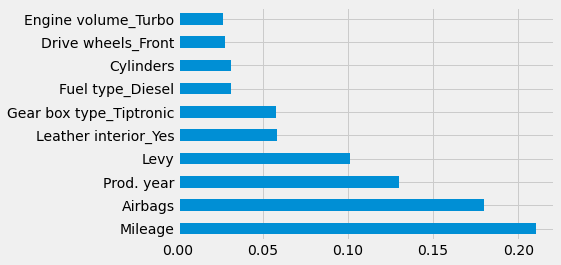

In [53]:
ranked_features = pd.Series(model.feature_importances_, index= X.columns)
ranked_features.nlargest(10).plot(kind= 'barh')
plt.show()

### 5.3 Correlation

<AxesSubplot:>

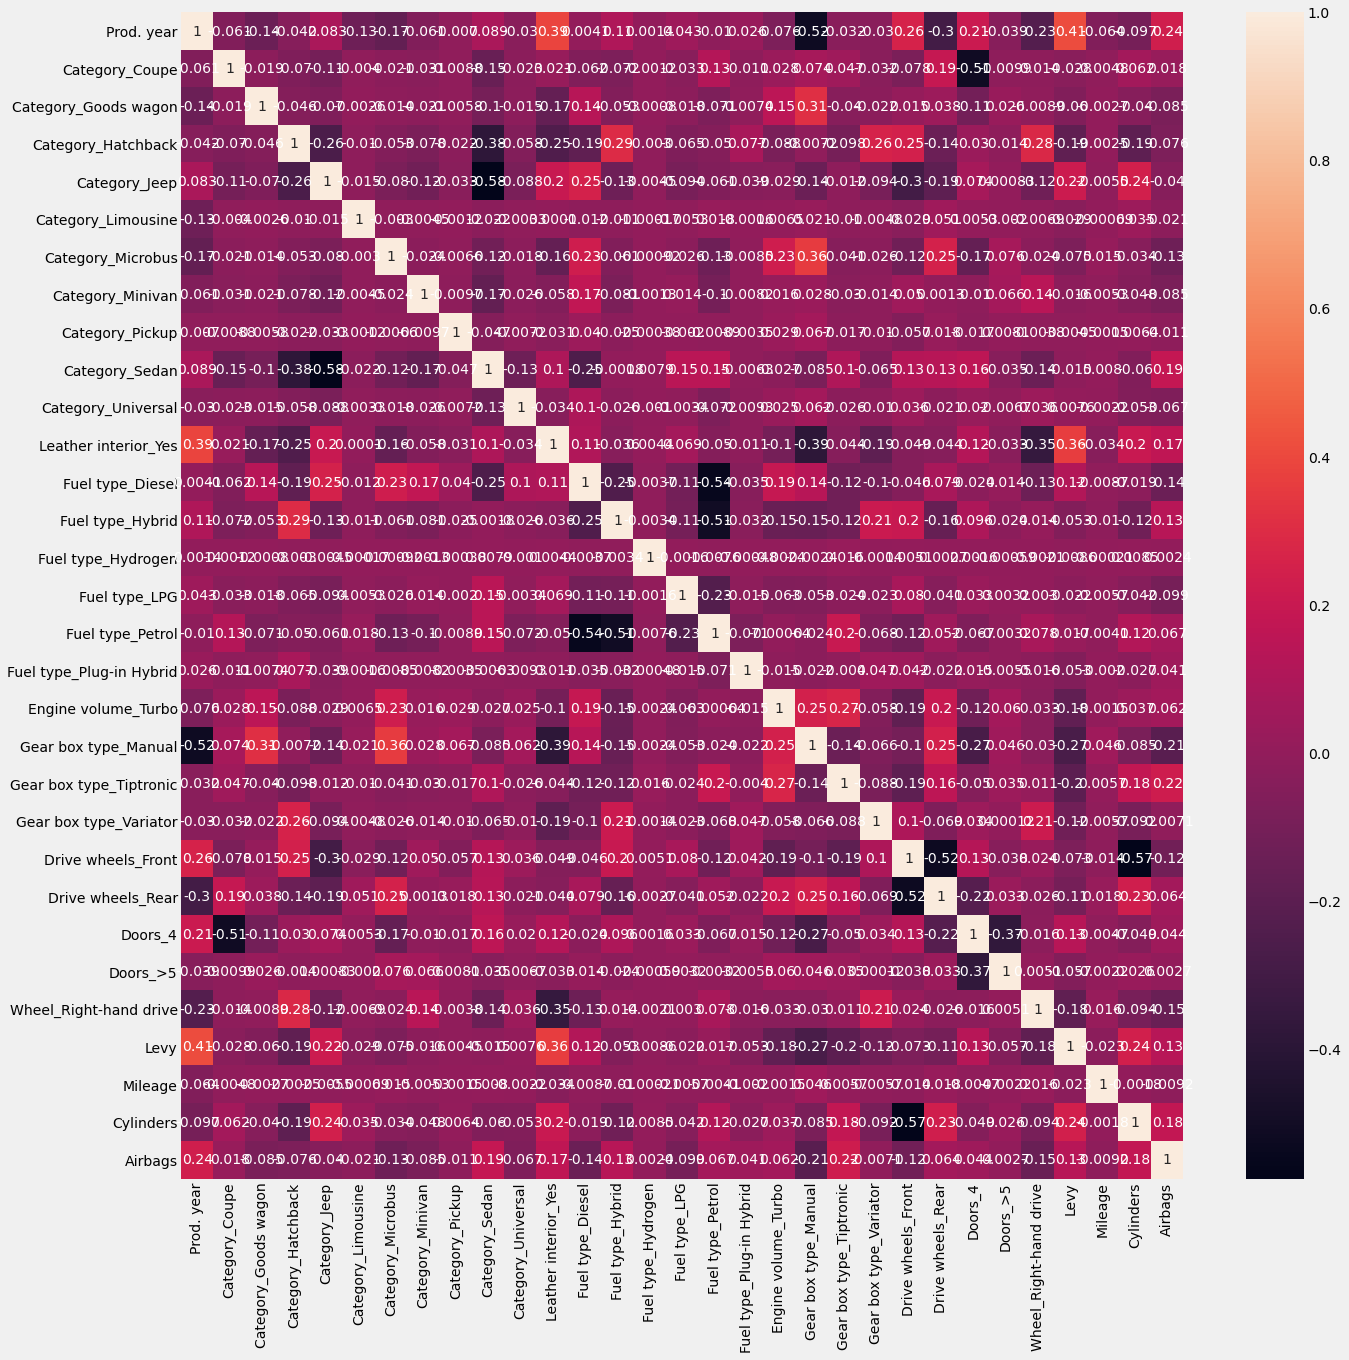

In [54]:
corr= train.iloc[:,1:].corr()
top_features = corr.index

# Plotting the Correlation Plots.
plt.figure(figsize= (20,20))
sns.heatmap(train[top_features].corr(), annot= True)

In [55]:
### Removing highly correlated Features. (With respect to the Independent Features)
threshold = 0.6

# Finding and Removing Correlated Features (Krish Naik).
def correlation(dataset, threshold):
    col_corr = set() ## Set of all the names of the Correlated Columns.
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # We are interested in the Absolute Coefficient value.
                colname = corr_matrix.columns[i] # getting the name of the column
                col_corr.add(colname)
    return col_corr

correlation(train.iloc[:,1:], threshold)

set()

- **From here we can see that there are no Features that are Highly Correlated.**

### 5.4 Information Gain

In [56]:
## Capture the Dependent Variable
y = train[['Price']]

## Capture the Independent Variables
X = train.drop(['Price'], axis= 1)

In [57]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X,y)

In [58]:
mutual_info

array([4.36196063e-01, 1.58394299e-03, 1.04628310e-02, 4.35366115e-02,
       8.00448015e-02, 5.17425792e-05, 7.78823543e-03, 2.56792887e-02,
       9.14362046e-04, 6.07948684e-02, 2.30089831e-02, 1.50479272e-01,
       1.01689034e-01, 6.83231391e-02, 1.86039211e-04, 3.93959971e-02,
       4.48568806e-02, 1.02282709e-03, 5.59848933e-02, 6.23308536e-02,
       1.05128046e-01, 2.46755909e-02, 1.08861901e-01, 3.48033094e-02,
       2.24133302e-02, 4.47711684e-03, 6.91915814e-02, 8.59460988e-01,
       9.04608820e-01, 1.05929873e-01, 4.51187081e-01])

In [59]:
mutual_data = pd.Series(mutual_info, index= X.columns)
mutual_data.sort_values(ascending= False)

Mileage                     0.904609
Levy                        0.859461
Airbags                     0.451187
Prod. year                  0.436196
Leather interior_Yes        0.150479
Drive wheels_Front          0.108862
Cylinders                   0.105930
Gear box type_Tiptronic     0.105128
Fuel type_Diesel            0.101689
Category_Jeep               0.080045
Wheel_Right-hand drive      0.069192
Fuel type_Hybrid            0.068323
Gear box type_Manual        0.062331
Category_Sedan              0.060795
Engine volume_Turbo         0.055985
Fuel type_Petrol            0.044857
Category_Hatchback          0.043537
Fuel type_LPG               0.039396
Drive wheels_Rear           0.034803
Category_Minivan            0.025679
Gear box type_Variator      0.024676
Category_Universal          0.023009
Doors_4                     0.022413
Category_Goods wagon        0.010463
Category_Microbus           0.007788
Doors_>5                    0.004477
Category_Coupe              0.001584
F

### Feature Selection - Conclusion

In [60]:
train.drop(columns= ['Category_Universal', 'Doors_4', 'Category_Limousine', 'Category_Microbus', 'Category_Goods wagon', 
                    'Fuel type_Plug-in Hybrid', 'Fuel type_Hydrogen', 'Category_Pickup', 'Category_Coupe', 'Doors_>5'], inplace= True)

train.head()

,Price,Prod. year,Category_Hatchback,Category_Jeep,Category_Minivan,Category_Sedan,Leather interior_Yes,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_LPG,Fuel type_Petrol,Engine volume_Turbo,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Levy,Mileage,Cylinders,Airbags
0,9.497622,2010,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.825518,0.505310,2.0,0.75
1,9.718422,2011,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.410033,0.555794,2.0,0.25
2,9.043932,2006,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,-0.700109,0.623163,0.0,-0.50
3,8.190632,2011,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0.239913,0.361822,0.0,-0.75
4,9.369564,2014,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,-0.213740,-0.287152,0.0,-0.25


In [61]:
train.shape

(19237, 22)

# Testing Dataset 

In [62]:
# Viewing the test dataset
test = pd.read_csv('test.csv')
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [63]:
print("Dimensionality of the test dataset: ", test.shape)

Dimensionality of the test dataset:  (8245, 18)


## 6. Feature Engineering 

### Dealing with Special values 

- Replacing '-' with NaN Values in the Levy Column.

In [64]:
test['Levy'].replace('-',np.nan, inplace= True)
test.fillna(0, inplace= True)
test.drop(columns= ['ID', 'Manufacturer', 'Model', 'Color', 'Price'], inplace= True)
test.head()

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
0,0,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,10
1,0,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,10
2,0,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,8
3,975,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,12
4,0,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,0


### Missing Values

- In any dataset we will initially try to find out where the missing data are, because then we will know what are the major NaN values in our dataset. 

<AxesSubplot:>

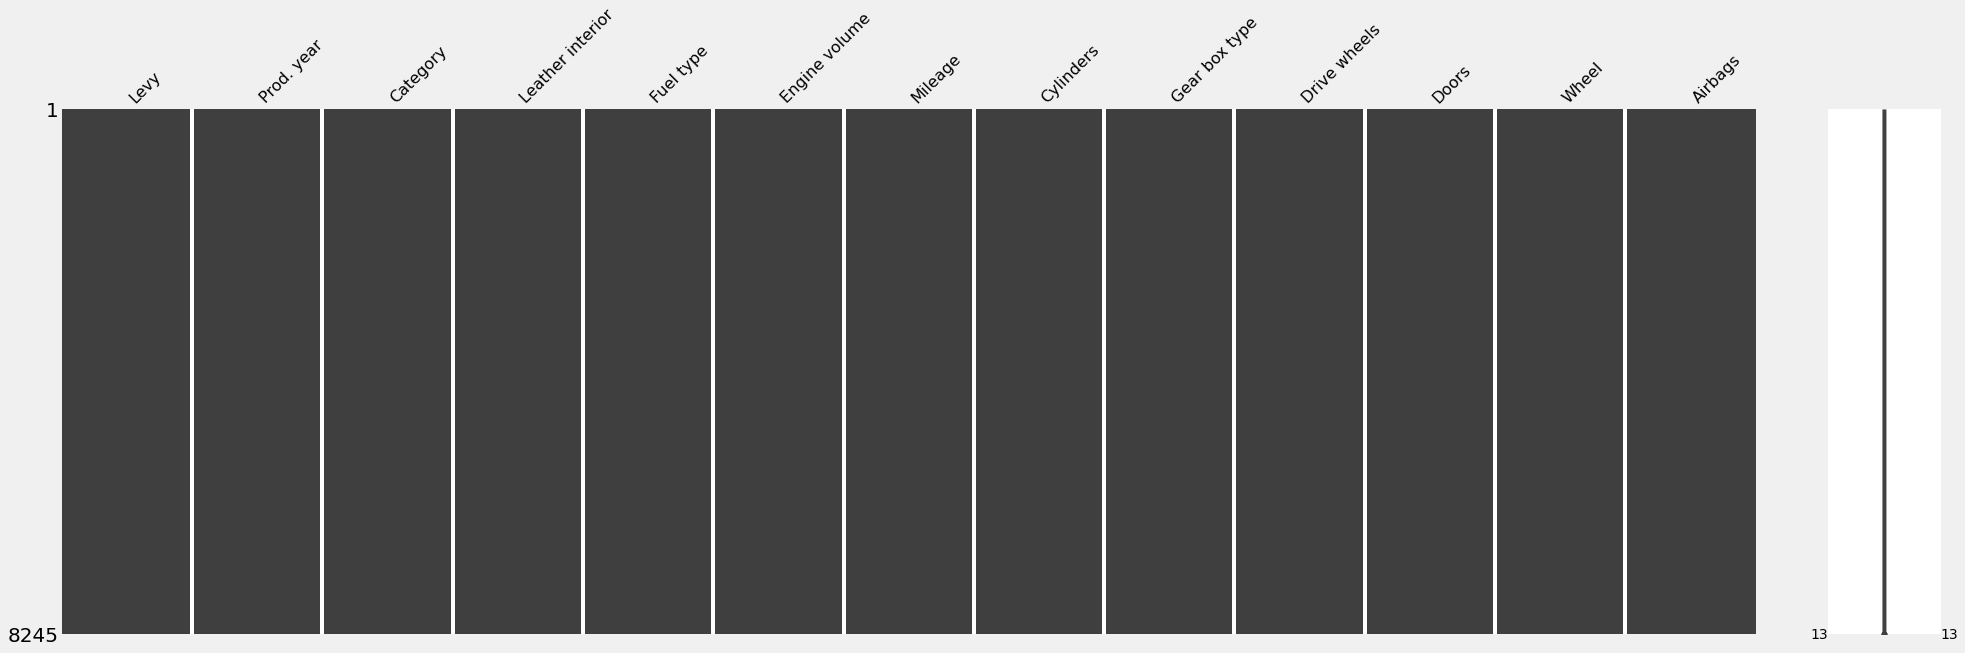

In [65]:
# To plot a graphic of missing values
missingno.matrix(test,figsize=(30,9))

In [66]:
# Understanding more about the missing value column

def missing_values_table(df):
    # number of missing values
    mis_val = df.isnull().sum()

    # % of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # make table # axis '0' concat along index, '1' column
    mis_val_table = pd.concat([mis_val,mis_val_percent], axis= 1) 

    # rename columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})

    # sort by column
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1]!= 0].sort_values(
        '% of Total Values', ascending= False).round(1) #Review
    print("Your selected dataset has " + str(df.shape[1]) + " columns and " + str(len(df)) + " observations.\n"
         "\n There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    
    # return the dataframe with missing info
    return mis_val_table_ren_columns

missing_values_table(test)

Your selected dataset has 13 columns and 8245 observations.

 There are 0 columns that have missing values.


,Missing Values,% of Total Values


### What Datatypes are there in the dataframe?

We usually consider features with a datatype of object as categorical features. And those with float or int could be numerical features.

However, sometimes the features that we consider as numerical might actually turn out to be categorical.

The next few steps will help us figure out how to process our data so our machine learning model can learn from it.
Ideally all the features will be encoded into a numerical value of some kind (maybe 0 or 1 / something else).

In [67]:
# Datatypes in the dataset
test.dtypes

Levy                object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage             object
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Wheel               object
Airbags              int64
dtype: object

### 6.1 **Exploring each of these features**
We will go through each of the columns and see which all we can use in our first models. Some of them needs more preprocessing than the others to get ready.

#### FEATURE 1: Levy

In [68]:
test['Levy'] = test['Levy'].astype(float)

## Observing the unique values.
test.Levy.unique()

array([   0.,  975.,  639., 1646., 1172.,  891.,  645.,  609.,  663.,
        765.,  585.,  696.,  531.,  530.,  777.,  586., 1053., 1190.,
        781.,  707.,  490.,  919., 1266., 1850.,  836.,  730.,  503.,
        697.,  474., 1714.,  751.,  382.,  502.,  769.,  640.,  761.,
       1017., 1077., 1750.,  831., 1249., 1058.,  650.,  259., 1292.,
       1935., 1675., 1083.,  521.,  584., 1094.,  642.,  397., 1399.,
       1342.,  583., 1211.,  551., 1091., 1624., 1024.,  779.,  915.,
        501.,  649., 1325., 1995., 1363.,  878.,  966.,  562., 1408.,
        607.,  638., 1076.,  934.,  475., 1055.,  978., 2297., 1360.,
       1051., 1268.,  790., 1018.,  690.,  749.,  441., 1438.,  862.,
        518., 1185., 1673.,  900., 1282., 1138.,  753.,  394.,  917.,
       1883., 1405., 1111., 1234.,  399.,  687., 1659.,  333., 1613.,
        308., 2080.,  830., 1537.,  694., 1811.,  784.,  629., 1011.,
       1493.,  155., 1968., 1080.,  988.,  746., 1324., 1664., 1267.,
       2908., 1104.,

<AxesSubplot:ylabel='Density'>

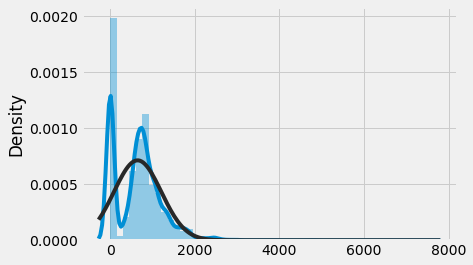

In [69]:
# Normality Check
sns.distplot(x= test['Levy'], fit= norm)

In [70]:
## Z-Score --> When Feature followa Normal Distibution.

mean = test['Levy'].mean()
std = test['Levy'].std()

Upper_Bound = mean + (3*std)
Lower_Bound = mean - (3*std)

test['Levy'][test['Levy'] < Lower_Bound] = Lower_Bound
test['Levy'][test['Levy'] > Upper_Bound] = Upper_Bound

<AxesSubplot:xlabel='Levy'>

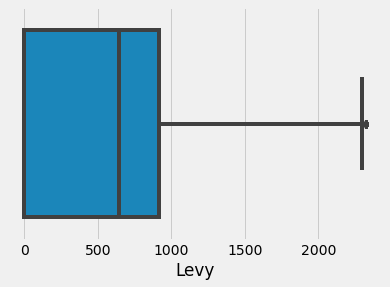

In [71]:
sns.boxplot(x= test['Levy'])

#### FEATURE 5: Engine Volume

In [72]:
test['Engine volume'].unique()

array(['2.0 Turbo', '2.4', '1.5', '3.2', '1.6', '4.6', '3.5', '2', '1.8',
       '2.5', '1.7', '2.2 Turbo', '2.3 Turbo', '4', '1.3', '3',
       '1.4 Turbo', '2.2', '3.0 Turbo', '3.3', '2.9 Turbo', '1.4',
       '3.2 Turbo', '4.8', '3.6', '2.7', '1.8 Turbo', '1', '1.5 Turbo',
       '2.4 Turbo', '0.7', '5.5', '1.7 Turbo', '4.4', '4.7', '5', '1.2',
       '2.8', '3.8', '1.6 Turbo', '2.6', '5.3', '3.7', '5.7', '6.6',
       '1.3 Turbo', '2.3', '0.2', '4.7 Turbo', '2.5 Turbo', '6.4', '5.6',
       '1.9 Turbo', '3.4', '5.5 Turbo', '6.7', '0.4', '4.4 Turbo',
       '2.7 Turbo', '4.2', '2.1', '2.1 Turbo', '6.2', '0.8 Turbo', '0',
       '6', '4.3', '1.9', '1.1', '4.6 Turbo', '3.1', '1.2 Turbo', '0.8',
       '3.5 Turbo', '0.6 Turbo', '4.5 Turbo', '6.3', '6.1', '4.8 Turbo',
       '0.5', '4.0 Turbo', '3.6 Turbo', '10.8', '0.7 Turbo', '5.4',
       '3.7 Turbo', '4.2 Turbo', '4.5', '0.6', '2.8 Turbo', '2.9',
       '0.3 Turbo', '1.0 Turbo', '5.2', '6.0 Turbo', '3.9', '2.6 Turbo'],
      dtype=o

In [73]:
test['Engine volume'] = test['Engine volume'].apply(lambda x: x.split(' ')[1] if ' ' in x else 'Not Turbo')

In [74]:
test['Engine volume'].unique()

array(['Turbo', 'Not Turbo'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Engine volume'>

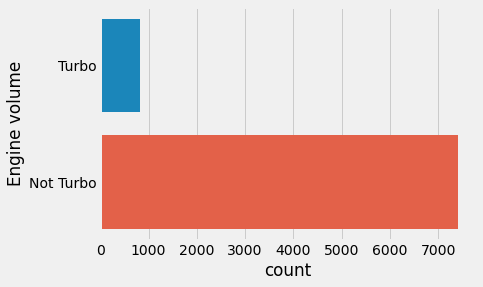

In [75]:
sns.countplot(y= test['Engine volume'])

#### FEATURE 6: Mileage

In [76]:
test['Mileage'].unique()

array(['0 km', '26000 km', '168000 km', ..., '81109 km', '146697 km',
       '148633 km'], dtype=object)

In [77]:
test['Mileage'] = test['Mileage'].apply(lambda x: x.split('km')[0] if 'km' in x else x).astype(int)

#### FEATURE 7: Doors

<AxesSubplot:xlabel='count', ylabel='Doors'>

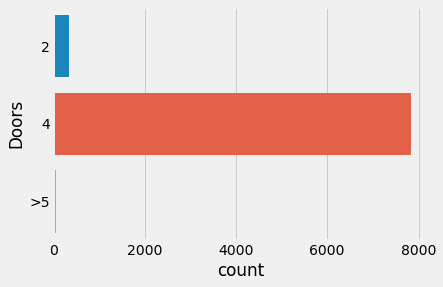

In [78]:
test['Doors'] = test['Doors'].apply(lambda x: x.split('-')[0] if '-' in x else x)
test['Doors'] = test['Doors'].apply(lambda x: x.split('0')[1] if '0' in x else x)
sns.countplot(y= test['Doors'])

## 7. Feature Encoding & Feature Scaling

In [79]:
test.head()

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
0,0.0,2012,Hatchback,No,Diesel,Turbo,0,4,Manual,Front,2,Left wheel,10
1,0.0,2012,Sedan,Yes,Petrol,Not Turbo,26000,4,Tiptronic,Front,4,Left wheel,10
2,0.0,2005,Sedan,No,Petrol,Not Turbo,168000,4,Automatic,Front,4,Right-hand drive,8
3,975.0,2012,Jeep,Yes,Petrol,Not Turbo,143000,6,Automatic,4x4,4,Left wheel,12
4,0.0,1993,Hatchback,No,Petrol,Not Turbo,200000,4,Manual,Front,4,Left wheel,0


### 7.1 Dealing with Categorical Columns (Feature Encoding)

In [80]:
# Obtaining the Categorical Columns
categorical_features = [features for features in  test.columns if test[features].dtypes == 'O'] 
categorical_features

['Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel']

In [81]:
# Let's See how many labels each feature has

for feature in categorical_features:
    print(feature,':',test[feature].nunique(),'labels')

Category : 11 labels
Leather interior : 2 labels
Fuel type : 7 labels
Engine volume : 2 labels
Gear box type : 4 labels
Drive wheels : 3 labels
Doors : 3 labels
Wheel : 2 labels


In [82]:
test = pd.get_dummies(test, drop_first=True)
test.shape

(8245, 31)

In [83]:
test.head()

,Levy,Prod. year,Mileage,Cylinders,Airbags,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Leather interior_Yes,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Engine volume_Turbo,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Doors_4,Doors_>5,Wheel_Right-hand drive
0,0.0,2012,0,4,10,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0
1,0.0,2012,26000,4,10,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
2,0.0,2005,168000,4,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
3,975.0,2012,143000,6,12,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0.0,1993,200000,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0


### 7.2 Dealing with Numerical Columns (Feature Scaling)

We are performing Feature Scaling because as we can see there are many Features that are measured to different units. With the help of Feature Scaling we can apply **Machine Learning Algorithms** in a better way.

In [84]:
# Obtaining Numerical Columns
numerical_features = [features for features in test.columns if test[features].dtypes != 'O'] 
numerical_features

['Levy',
 'Prod. year',
 'Mileage',
 'Cylinders',
 'Airbags',
 'Category_Coupe',
 'Category_Goods wagon',
 'Category_Hatchback',
 'Category_Jeep',
 'Category_Limousine',
 'Category_Microbus',
 'Category_Minivan',
 'Category_Pickup',
 'Category_Sedan',
 'Category_Universal',
 'Leather interior_Yes',
 'Fuel type_Diesel',
 'Fuel type_Hybrid',
 'Fuel type_Hydrogen',
 'Fuel type_LPG',
 'Fuel type_Petrol',
 'Fuel type_Plug-in Hybrid',
 'Engine volume_Turbo',
 'Gear box type_Manual',
 'Gear box type_Tiptronic',
 'Gear box type_Variator',
 'Drive wheels_Front',
 'Drive wheels_Rear',
 'Doors_4',
 'Doors_>5',
 'Wheel_Right-hand drive']

In [85]:
# Selecting all Features that need to be Scaled except 'Prod. year' & 'Price'.
scale_feature = [features for features in numerical_features if features not in ['Prod. year', 'Category_Coupe', 'Category_Goods wagon', 'Category_Hatchback', 'Category_Jeep', 'Category_Limousine', 
       'Category_Microbus', 'Category_Minivan', 'Category_Pickup', 'Category_Sedan', 'Category_Universal', 'Leather interior_Yes', 
       'Fuel type_Diesel', 'Fuel type_Hybrid', 'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid', 
       'Engine volume_Turbo', 'Gear box type_Manual', 'Gear box type_Tiptronic', 'Gear box type_Variator', 'Drive wheels_Front', 
       'Drive wheels_Rear','Doors_4', 'Doors_>5', 'Wheel_Right-hand drive']]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler = RobustScaler()

# Transform the train set and add the 'Prod. year' & 'Price' Columns.
test = pd.concat([test[['Prod. year', 'Category_Coupe', 'Category_Goods wagon', 'Category_Hatchback', 'Category_Jeep', 'Category_Limousine', 
       'Category_Microbus', 'Category_Minivan', 'Category_Pickup', 'Category_Sedan', 'Category_Universal', 'Leather interior_Yes', 
       'Fuel type_Diesel', 'Fuel type_Hybrid', 'Fuel type_Hydrogen', 'Fuel type_LPG', 'Fuel type_Petrol', 'Fuel type_Plug-in Hybrid', 
       'Engine volume_Turbo', 'Gear box type_Manual', 'Gear box type_Tiptronic', 'Gear box type_Variator', 'Drive wheels_Front', 
       'Drive wheels_Rear','Doors_4', 'Doors_>5', 'Wheel_Right-hand drive']].reset_index(drop= True), 
       pd.DataFrame(scaler.fit_transform(test[scale_feature]), columns= scale_feature)], axis= 1) 
       ## Converting to Dataframe as after transform its an array.

test.head()

,Prod. year,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Leather interior_Yes,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Engine volume_Turbo,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Doors_4,Doors_>5,Wheel_Right-hand drive,Levy,Mileage,Cylinders,Airbags
0,2012,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,-0.701850,-1.059992,0.0,0.50
1,2012,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,-0.701850,-0.844133,0.0,0.50
2,2005,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,-0.701850,0.334789,0.0,0.25
3,2012,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.359086,0.127232,2.0,0.75
4,1993,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,-0.701850,0.600462,0.0,-0.75


## 8. Feature Selection

In [86]:
test.head()

,Prod. year,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Leather interior_Yes,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Engine volume_Turbo,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear,Doors_4,Doors_>5,Wheel_Right-hand drive,Levy,Mileage,Cylinders,Airbags
0,2012,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,-0.701850,-1.059992,0.0,0.50
1,2012,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,-0.701850,-0.844133,0.0,0.50
2,2005,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,-0.701850,0.334789,0.0,0.25
3,2012,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.359086,0.127232,2.0,0.75
4,1993,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,-0.701850,0.600462,0.0,-0.75


In [87]:
print("Dimensionality of the test dataset: ", test.shape)

Dimensionality of the test dataset:  (8245, 31)


### 8.1 Correlation

<AxesSubplot:>

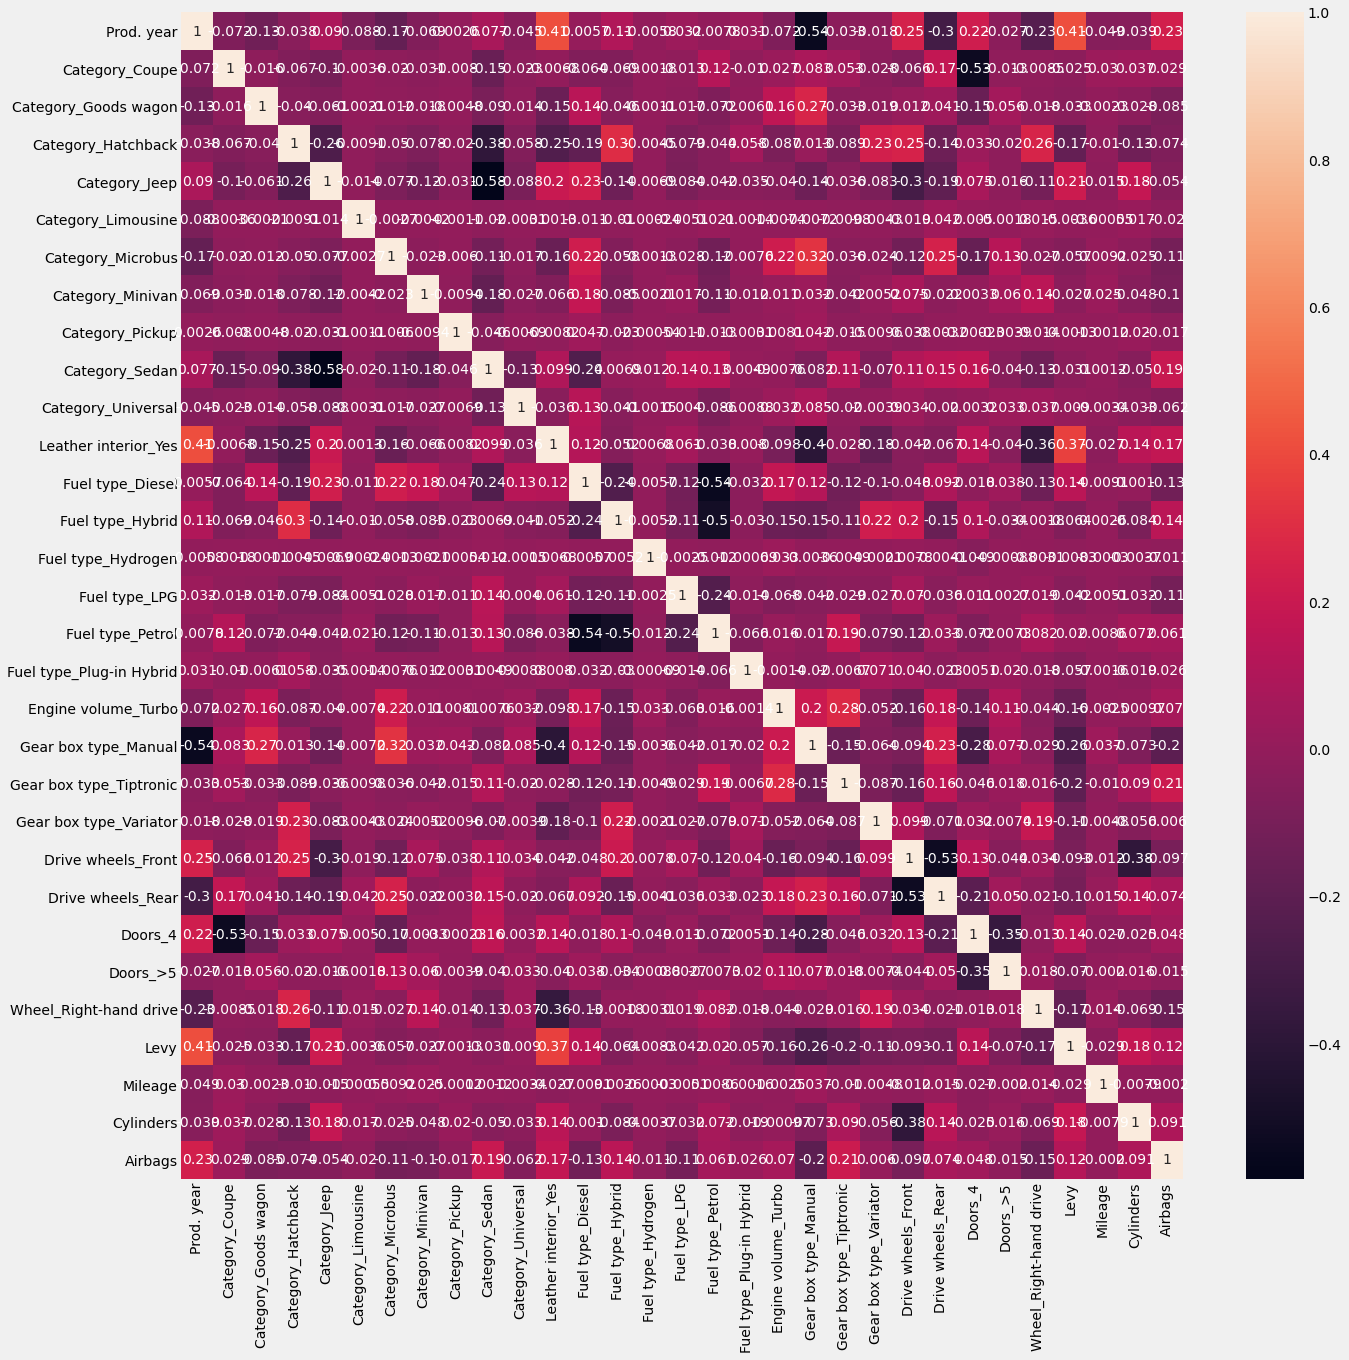

In [88]:
corr= test.corr()
top_features = corr.index

# Plotting the Correlation Plots.
plt.figure(figsize= (20,20))
sns.heatmap(test[top_features].corr(), annot= True)

In [89]:
train.columns

Index(['Price', 'Prod. year', 'Category_Hatchback', 'Category_Jeep',
       'Category_Minivan', 'Category_Sedan', 'Leather interior_Yes',
       'Fuel type_Diesel', 'Fuel type_Hybrid', 'Fuel type_LPG',
       'Fuel type_Petrol', 'Engine volume_Turbo', 'Gear box type_Manual',
       'Gear box type_Tiptronic', 'Gear box type_Variator',
       'Drive wheels_Front', 'Drive wheels_Rear', 'Wheel_Right-hand drive',
       'Levy', 'Mileage', 'Cylinders', 'Airbags'],
      dtype='object')

In [92]:
train.rename(columns= {'Prod. year': 'Year', 'Category_Hatchback': 'Hatchback', 'Category_Jeep': 'Jeep', 'Category_Minivan': 'Minivan',
                        'Category_Sedan': 'Sedan', 'Leather interior_Yes': 'Leather_Yes', 'Fuel type_Diesel': 'Diesel', 'Fuel type_Hybrid': 'Hybrid', 
                        'Fuel type_LPG': 'LPG', 'Fuel type_Petrol': 'Petrol', 'Engine volume_Turbo': 'Turbo', 'Gear box type_Manual': 'Gear_Manual',
                        'Gear box type_Tiptronic': 'Gear_Tiptronic', 'Gear box type_Variator': 'Gear_Variator', 'Drive wheels_Front': 'Front_Wheel', 'Drive wheels_Rear': 'Rear_Wheel',
                        'Wheel_Right-hand drive': 'RightHand_Drive'}, inplace= True)

train.columns

Index(['Price', 'Year', 'Hatchback', 'Jeep', 'Minivan', 'Sedan', 'Leather_Yes',
       'Diesel', 'Hybrid', 'LPG', 'Petrol', 'Turbo', 'Gear_Manual',
       'Gear_Tiptronic', 'Gear_Variator', 'Front_Wheel', 'Rear_Wheel',
       'RightHand_Drive', 'Levy', 'Mileage', 'Cylinders', 'Airbags'],
      dtype='object')

In [93]:
test.rename(columns= {'Prod. year': 'Year', 'Category_Hatchback': 'Hatchback', 'Category_Jeep': 'Jeep', 'Category_Minivan': 'Minivan',
                        'Category_Sedan': 'Sedan', 'Leather interior_Yes': 'Leather_Yes', 'Fuel type_Diesel': 'Diesel', 'Fuel type_Hybrid': 'Hybrid', 
                        'Fuel type_LPG': 'LPG', 'Fuel type_Petrol': 'Petrol', 'Engine volume_Turbo': 'Turbo', 'Gear box type_Manual': 'Gear_Manual',
                        'Gear box type_Tiptronic': 'Gear_Tiptronic', 'Gear box type_Variator': 'Gear_Variator', 'Drive wheels_Front': 'Front_Wheel', 'Drive wheels_Rear': 'Rear_Wheel',
                        'Wheel_Right-hand drive': 'RightHand_Drive'}, inplace= True)

test.columns

Index(['Year', 'Category_Coupe', 'Category_Goods wagon', 'Hatchback', 'Jeep',
       'Category_Limousine', 'Category_Microbus', 'Minivan', 'Category_Pickup',
       'Sedan', 'Category_Universal', 'Leather_Yes', 'Diesel', 'Hybrid',
       'Fuel type_Hydrogen', 'LPG', 'Petrol', 'Fuel type_Plug-in Hybrid',
       'Turbo', 'Gear_Manual', 'Gear_Tiptronic', 'Gear_Variator',
       'Front_Wheel', 'Rear_Wheel', 'Doors_4', 'Doors_>5', 'RightHand_Drive',
       'Levy', 'Mileage', 'Cylinders', 'Airbags'],
      dtype='object')

# Model Building

## Initial Analysis of the different Models.

In [94]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [95]:
## Capture the Dependent Variable
y = train[['Price']]

## Capture the Independent Variables
X = train.drop(['Price'], axis= 1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 42)

In [97]:
reg = LazyRegressor(verbose= 0, ignore_warnings= False, custom_metric= None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 26%|██▌       | 11/42 [00:44<04:47,  9.27s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 903. MiB for an array with shape (118402966,) and data type float64


 38%|███▊      | 16/42 [01:02<02:03,  4.75s/it]

KernelRidge model failed to execute
Unable to allocate 1.76 GiB for an array with shape (15389, 15389) and data type float64


100%|██████████| 42/42 [24:07<00:00, 34.46s/it]


In [98]:
models.head()

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.62,0.62,0.93,81.02
XGBRegressor,0.62,0.62,0.93,35.48
ExtraTreesRegressor,0.61,0.61,0.94,13.67
BaggingRegressor,0.59,0.59,0.97,1.95
LGBMRegressor,0.59,0.59,0.97,13.79


In [99]:
predictions.head()

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.62,0.62,0.93,81.02
XGBRegressor,0.62,0.62,0.93,35.48
ExtraTreesRegressor,0.61,0.61,0.94,13.67
BaggingRegressor,0.59,0.59,0.97,1.95
LGBMRegressor,0.59,0.59,0.97,13.79


## Random Forest Regressor - HyperParameter Tuning

In [100]:
## Randomized Search CV - Faster than GridSearchCV

# The number of trees in the forest.
n_estimators = [int(x) for x in np.linspace(start= 100, stop= 1200, num= 12)]
# The number of features to consider when looking for the best split
max_features = ['auto', 'sqrt']
# The maximum depth/levels of the tree.
max_depth = [int(x) for x in np.linspace(5, 30, num= 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [101]:
## Hyper Parameter Optimization

## Key Dictionary
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [102]:
## Hyper-Parameter Optimization Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [103]:
rf_search = RandomizedSearchCV(estimator= rf, param_distributions= random_grid, scoring= 'neg_mean_squared_log_error', n_iter = 50, cv = 5, verbose=2, random_state= 42, n_jobs = -1)

In [104]:
rf_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 37.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_log_error',
                   verbose=2)

In [105]:
rf_search.best_params_

{'n_estimators': 1100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [106]:
rf_search.best_score_

-0.012872576512588343

### Model Evaluation - HyperParameter Tuning

> #### This will never lead to overfitting as we had done Hyperparameter Tuning. This will give us a generalized model.

<AxesSubplot:ylabel='Density'>

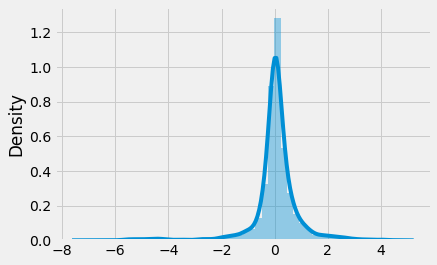

In [107]:
## Predict
prediction = rf_search.predict(X_test)
sns.distplot(y_test-prediction.reshape(3848,1))

## Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

### Comparing these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.



In [108]:
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error

print('MAE: ', metrics.mean_absolute_error(y_test, prediction))
print('MSE: ', metrics.mean_squared_error(y_test, prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


final_rmsle = np.sqrt(mean_squared_log_error(y_test, prediction))
print('The final RMSLE on the test set is', round(final_rmsle, 2))

MAE:  0.49006976950648135
MSE:  0.8384410212418473
RMSE:  0.9156642513726564
The final RMSLE on the test set is 0.11


In [111]:
test = test[['Year', 'Hatchback', 'Jeep', 'Minivan', 'Sedan', 'Leather_Yes', 
            'Diesel', 'Hybrid', 'LPG', 'Petrol', 'Turbo', 'Gear_Manual',
            'Gear_Tiptronic', 'Gear_Variator', 'Front_Wheel', 'Rear_Wheel', 'RightHand_Drive',
            'Levy', 'Mileage', 'Cylinders', 'Airbags']]
test.head()

,Year,Hatchback,Jeep,Minivan,Sedan,Leather_Yes,Diesel,Hybrid,LPG,Petrol,Turbo,Gear_Manual,Gear_Tiptronic,Gear_Variator,Front_Wheel,Rear_Wheel,RightHand_Drive,Levy,Mileage,Cylinders,Airbags
0,2012,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,-0.70,-1.06,0.00,0.50
1,2012,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,-0.70,-0.84,0.00,0.50
2,2005,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,-0.70,0.33,0.00,0.25
3,2012,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.36,0.13,2.00,0.75
4,1993,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,-0.70,0.60,0.00,-0.75


In [112]:
x = rf_search.predict(test)

In [113]:
predictions = np.exp(x)
predictions

array([ 8718.21547018, 10241.73197642,  8308.09572175, ...,
         518.42813753, 32418.28058722,   766.50512069])

In [114]:
# Create a dataframe and append the relevant colimns.
submission = pd.DataFrame()
submission['Price'] = predictions
submission.head(10)

,Price
0,8718.22
1,10241.73
2,8308.10
3,5758.61
4,1974.50
5,29846.41
6,518.43
7,10175.47
8,15193.36
9,14564.67


In [115]:
submission.shape

(8245, 1)

In [116]:
# convert submission dataframe to csv.
submission.to_csv('final_submission.csv', index= False)
print('Submission csv is ready')

Submission csv is ready


In [117]:
import pickle

## Open a file, where we want to store the data.
file = open('random_forest_model.pkl', 'wb')

## Dump all the information to this file.
pickle.dump(rf_search, file)